# Segmenting and Clustering Neighborhoods in Toronto

## Introduction

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#menu1">Download and Explore Dataset</a>

2. <a href="#menu2">Explore Neighborhoods in New York City</a>

3. <a href="#menu3">Analyze Each Neighborhood</a>

4. <a href="#menu4">Cluster Neighborhoods</a>

5. <a href="#menu5">Examine Clusters</a>    
</font>
</div>

Importing libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
import geopandas as gpd #geospatial data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<a id='menu1'></a>

## 1. Download and Explore Dataset

Community council: https://portal0.cf.opendata.inter.sandbox-toronto.ca/dataset/community-council-boundaries/

Wards: https://portal0.cf.opendata.inter.sandbox-toronto.ca/dataset/city-wards/

Community planning: https://portal0.cf.opendata.inter.sandbox-toronto.ca/dataset/community-planning-boundaries/

Toronto boundary: https://portal0.cf.opendata.inter.sandbox-toronto.ca/dataset/regional-municipal-boundary/

Neighborhood profile: https://portal0.cf.opendata.inter.sandbox-toronto.ca/dataset/neighbourhood-profiles/

Neighborhood: https://portal0.cf.opendata.inter.sandbox-toronto.ca/dataset/neighbourhoods/

In [73]:
gdf_community_council = gpd.read_file('data/Community Council Boundaries Data.geojson')
gdf_neighborhood = gpd.read_file('data/Neighbourhoods.geojson')
gdf_wards = gpd.read_file('data/City Wards Data.geojson')
# gdf_toronto_boundary = gpd.read_file('data/torontoBoundary_wgs84/citygcs_regional_mun_wgs84.shp')
# gdf_community_planning = gpd.read_file('data/community_planning_boundary_wgs84/COMMUNITY_PLANNING_BNDRY_WGS84.shp')

In [41]:
# print(gdf_community_planning.shape)
# gdf_community_planning.head()

In [42]:
# print(gdf_toronto_boundary.shape)
# gdf_toronto_boundary.head()

In [17]:
print(gdf_neighborhood.shape)
gdf_neighborhood.head()

(140, 16)


,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,841,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),None,None,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,POLYGON ((-79.43591570873059 43.68015339477487...
1,842,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),None,None,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,POLYGON ((-79.41095783825973 43.70408282301482...
2,843,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),None,None,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,POLYGON ((-79.39119482591805 43.68108112277795...
3,844,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),None,None,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,POLYGON ((-79.50528791818931 43.75987349878096...
4,845,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),None,None,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"POLYGON ((-79.4396873322608 43.70560981891119,..."


In [46]:
print(gdf_community_council.shape)
gdf_community_council


(4, 16)


,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,25,2476922,26002906,None,EA,EA,Scarborough Community Council,Scarborough Community Council,325977.228,4848710.992,-79.236918,43.778057,17503889,3.616463e+08,99909.825113,POLYGON ((-79.15179162455914 43.81409053376601...
1,26,2476921,26002905,None,SO,SO,Toronto and East York Community Council,Toronto and East York Community Council,313987.302,4836217.155,-79.386080,43.665843,17503905,2.243080e+08,127947.223220,POLYGON ((-79.29863870134947 43.71514786351841...
2,27,2476920,26002904,None,NO,NO,North York Community Council,North York Community Council,312734.494,4845517.247,-79.401477,43.749570,17503921,2.980871e+08,82762.050989,POLYGON ((-79.31326282774432 43.75221330812462...
3,28,2476919,26002903,None,WE,WE,Etobicoke York Community Council,Etobicoke York Community Council,301398.386,4838724.172,-79.542195,43.688458,17503937,3.471409e+08,124437.576898,POLYGON ((-79.48847930500921 43.75332810175874...


In [75]:
print(gdf_wards.shape)
gdf_wards.head()

(25, 26)


,_id,AREA_ID,DATE_EFFECTIVE,DATE_EXPIRY,AREA_ATTR_ID,AREA_TYPE_ID,PARENT_AREA_ID,AREA_TYPE,AREA_CLASS_ID,AREA_CLASS,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,FEATURE_CODE,FEATURE_CODE_DESC,TRANS_ID_CREATE,TRANS_ID_EXPIRE,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,151,2457740,2018-08-07T18:11:06,3000-01-01T05:00:00,25993196,528,None,CITW,None,None,7,7,Humber River-Black Creek,Humber River-Black Creek (7),None,None,279754,-1,None,None,-79.530272,43.750724,17344785,5.886873e+07,43438.943048,POLYGON ((-79.49105341069303 43.76350215283064...
1,152,2457739,2018-08-07T18:11:06,3000-01-01T05:00:00,25993195,528,None,CITW,None,None,6,6,York Centre,York Centre (6),None,None,279754,-1,None,None,-79.467810,43.752565,17344801,6.780539e+07,40910.174619,POLYGON ((-79.44043387852399 43.76339750966616...
2,153,2457738,2018-08-07T18:11:06,3000-01-01T05:00:00,25993194,528,None,CITW,None,None,18,18,Willowdale,Willowdale (18),None,None,279754,-1,None,None,-79.416500,43.776886,17344817,3.792649e+07,24766.996984,POLYGON ((-79.39449150636952 43.76157276461934...
3,154,2457737,2018-08-07T18:11:06,3000-01-01T05:00:00,25993193,528,None,CITW,None,None,11,11,University-Rosedale,University-Rosedale (11),None,None,279754,-1,None,None,-79.394317,43.671139,17344833,2.600299e+07,29861.631464,POLYGON ((-79.39003954025561 43.69050392407774...
4,155,2457736,2018-08-07T18:11:06,3000-01-01T05:00:00,25993192,528,None,CITW,None,None,19,19,Beaches-East York,Beaches-East York (19),None,None,279754,-1,None,None,-79.306673,43.689268,17344849,3.215503e+07,30975.878034,POLYGON ((-79.29863870134947 43.71514786351841...


In [44]:
# gdf_wards.describe(include='all')

In [47]:
# map_toronto = folium.Map(location=[43.6532, -79.3832], zoom_start=10)
# # gpd_wards.plot(figsize=(20,20))
# # plt.show()

# geojson_wards = gdf_wards.to_crs(epsg=4326)

# feat_wards = folium.features.GeoJson(geojson_wards)

# map_toronto.add_child(feat_wards)

# map_toronto

In [72]:
map_toronto = folium.Map(location=[43.6532, -79.3832], zoom_start=10,width=500,height=500)
# gpd_wards.plot(figsize=(20,20))
# plt.show()

geojson_wards = gdf_wards.to_crs(epsg=4326)

feat_wards = folium.features.GeoJson(geojson_wards)

map_toronto.add_child(feat_wards)

for lat, long, label in zip(gdf_neighborhood.LATITUDE, gdf_neighborhood.LONGITUDE, gdf_neighborhood.AREA_NAME):
        folium.CircleMarker(
            [lat, long],
            radius=5,
            color='yellow',
            fill=True,
            popup=label,
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(map_toronto)

map_toronto

In [59]:
# 43°39′27″N 79°29′33″W
map_toronto = folium.Map(location=[43.6532, -79.3832], zoom_start=11,width=500, height=500)
# map_toronto = folium.Map(location=[43.6532, -79.3832], zoom_start=11,width=500, height=500)
# gpd_wards.plot(figsize=(20,20))
# plt.show()

geojson_neighborhood = gdf_neighborhood.to_crs(epsg=4326)

feat_neighborhood = folium.features.GeoJson(geojson_neighborhood)
# feat_neighborhood = folium.features.GeoJson('data/Neighbourhoods.geojson')

# map_toronto.add_child(feat_neighborhood)

map_toronto

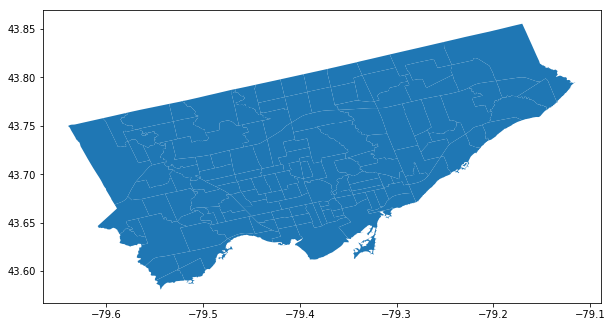

In [52]:
gdf_neighborhood.plot(figsize=(10,10))
plt.show()

In [63]:
gdf_scarborough = gdf_community_council[gdf_community_council.AREA_NAME=='Scarborough Community Council']
gdf_scarborough

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,25,2476922,26002906,None,EA,EA,Scarborough Community Council,Scarborough Community Council,325977.228,4848710.992,-79.236918,43.778057,17503889,3.616463e+08,99909.825113,POLYGON ((-79.15179162455914 43.81409053376601...


In [70]:
from shapely.geometry import Point
geom = gdf_neighborhood.apply(lambda x : Point([x['LONGITUDE'],x['LATITUDE']]),axis=1)
zips = gpd.GeoDataFrame(geometry=geom) #geom is a Series
zips.crs = {'init' :'epsg:4326'}
print (zips.head())


                                   geometry
0       POINT (-79.425514947 43.6769192679)
1  POINT (-79.4035901675 43.70468936770001)
2       POINT (-79.3978707687 43.687858872)
3      POINT (-79.4888829298 43.7657364909)
4  POINT (-79.4571080738 43.71467152930001)


In [71]:
gdf_scarborough_neighborhood = gpd.sjoin(zips, gdf_scarborough, op='within')
)

OSError: could not find or load spatialindex_c.dll

In [77]:
from bs4 import BeautifulSoup

In [94]:
wiki = 'https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Toronto'

r = requests.get(wiki)

In [167]:
soup = BeautifulSoup(r.content)
york = soup.find(id='Scarborough')
lis = york.parent.find_next_sibling('div').find_all('li')
df_neighbourhood = pd.DataFrame(columns=['name', 'latitude', 'longitude'])
# lis[0].a.get_text()
for li in lis:
    text = li.a.get_text()
    print(text)
    try:
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode("{}, Toronto".format(text))
        latitude = location.latitude
        longitude = location.longitude
        print("The geograpical coordinate of {} are {}, {}.".format(text, latitude, longitude))
        df_neighbourhood = df_neighbourhood.append({'name': text, 'latitude': latitude, 'longitude': longitude}, ignore_index=True)
    except:
        continue
df_neighbourhood
# pd.DataFrame.append()

Agincourt
The geograpical coordinate of Agincourt are 43.7853531, -79.2785494.
Armadale
The geograpical coordinate of Armadale are 43.8365868, -79.2511551.
Bendale
The geograpical coordinate of Bendale are 43.7535196, -79.2553355.
Birch Cliff
The geograpical coordinate of Birch Cliff are 43.70211215, -79.2600905301568.
 Birch Cliff Heights
The geograpical coordinate of  Birch Cliff Heights are 43.70211215, -79.2600905301568.
Brown's Corners
The geograpical coordinate of Brown's Corners are 43.8129887, -79.2430221.
Clairlea
The geograpical coordinate of Clairlea are 43.7088231, -79.2959856.
Cliffside
The geograpical coordinate of Cliffside are 43.7111699, -79.2481769.
Cliffcrest
The geograpical coordinate of Cliffcrest are 43.7219387, -79.2362324.
Dorset Park
The geograpical coordinate of Dorset Park are 43.7528467, -79.282067.
Eglinton East
The geograpical coordinate of Eglinton East are 43.739622, -79.2322904.
Golden Mile
The geograpical coordinate of Golden Mile are 43.7278414, -79.2

,name,latitude,longitude
0,Agincourt,43.785353,-79.278549
1,Armadale,43.836587,-79.251155
2,Bendale,43.753520,-79.255336
3,Birch Cliff,43.702112,-79.260091
4,Birch Cliff Heights,43.702112,-79.260091
5,Brown's Corners,43.812989,-79.243022
6,Clairlea,43.708823,-79.295986
7,Cliffside,43.711170,-79.248177
8,Cliffcrest,43.721939,-79.236232
9,Dorset Park,43.752847,-79.282067


In [168]:
map_toronto = folium.Map(location=[43.6532, -79.3832], zoom_start=10,width=500,height=500)
# gpd_wards.plot(figsize=(20,20))
# plt.show()

geojson_wards = gdf_wards.to_crs(epsg=4326)

feat_wards = folium.features.GeoJson(geojson_wards)

map_toronto.add_child(feat_wards)

for lat, long, label in zip(df_neighbourhood.latitude, df_neighbourhood.longitude, df_neighbourhood.name):
        folium.CircleMarker(
            [lat, long],
            radius=5,
            color='yellow',
            fill=True,
            popup=label,
            fill_color='blue',
            fill_opacity=0.6
        ).add_to(map_toronto)

map_toronto

#### Define Foursquare Credentials and Version

In [169]:
CLIENT_ID = 'WXNUH2PMIPGTENRW1DBJDNR0YB4PZSG3VKW3EFFMB435QANG' # your Foursquare ID
CLIENT_SECRET = 'IMYN2GET53TGRICI2MGHNN0JJIREVQLOAW1BOI2V0PD2TC3N' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WXNUH2PMIPGTENRW1DBJDNR0YB4PZSG3VKW3EFFMB435QANG
CLIENT_SECRET:IMYN2GET53TGRICI2MGHNN0JJIREVQLOAW1BOI2V0PD2TC3N


In [178]:
# df_neighbourhood.iloc[0].latitude
# # type your answer here
neighborhood_latitude, neighborhood_longitude = df_neighbourhood.iloc[0].latitude, df_neighbourhood.iloc[0].longitude
url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v=20180605&ll={},{}&radius=500&limit=100".format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude)
print(url)




https://api.foursquare.com/v2/venues/explore?client_id=WXNUH2PMIPGTENRW1DBJDNR0YB4PZSG3VKW3EFFMB435QANG&client_secret=IMYN2GET53TGRICI2MGHNN0JJIREVQLOAW1BOI2V0PD2TC3N&v=20180605&ll=43.7853531,-79.2785494&radius=500&limit=100


In [179]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ccf1ea19fb6b75700bfc094'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Agincourt',
  'headerFullLocation': 'Agincourt, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 13,
  'suggestedBounds': {'ne': {'lat': 43.789853104500004,
    'lng': -79.27232780227703},
   'sw': {'lat': 43.7808530955, 'lng': -79.28477099772297}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bdda89c587b2d7fd88a5409',
       'name': 'One2 Snacks',
       'location': {'address': '8 Glen Watford Drive',
        'lat': 43.787047925304336,
        'lng': -79.27665787813419,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.787

In [180]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [181]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,One2 Snacks,Asian Restaurant,43.787048,-79.276658
1,Tim Hortons,Coffee Shop,43.785637,-79.279215
2,Maple Yip Seafood 陸羽海鮮酒家,Chinese Restaurant,43.784752,-79.277787
3,In Cheon House Korean & Japanese Restaurant 인천관,Korean Restaurant,43.786468,-79.275693
4,Beef Noodle Restaurant 老李牛肉麵,Chinese Restaurant,43.785937,-79.276031


In [182]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

13 venues were returned by Foursquare.


In [183]:
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [185]:
# type your answer here

scarborough_venues = getNearbyVenues(names=df_neighbourhood['name'],
                                   latitudes=df_neighbourhood['latitude'],
                                   longitudes=df_neighbourhood['latitude']
                                  )



Agincourt
Armadale
Bendale
Birch Cliff
 Birch Cliff Heights
Brown's Corners
Clairlea
Cliffside
Cliffcrest
Dorset Park
Eglinton East
Golden Mile
Guildwood
Highland Creek
Ionview
L'Amoreaux
Malvern
Maryvale
Milliken
Morningside
Morningside Heights
Oakridge
Port Union
Rouge
Scarborough City Centre
Scarborough Junction
Scarborough Village
Steeles
Tam O'Shanter – Sullivan
West Hill
West Rouge
Wexford
Woburn


ValueError: Length mismatch: Expected axis has 0 elements, new values have 7 elements

<a id='menu2'></a>

## 2. Explore Neighborhoods in City of Toronto

<a id='menu3'></a>

## 3. Analyze Each Neighborhood

<a id='menu4'></a>

## 4. Cluster Neighborhoods

<a id='menu5'></a>

## 5. Examine Clusters